# 1. Загрузка данных и библиотек

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [114]:
data = pd.read_csv('Data/archive/Student Depression Dataset.csv')

In [115]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [116]:
data.shape

(27901, 18)

# 2. Первичный анализ и обработка данных

## 2.1 Рассмотрим соотношение количества меток целевой переменой 

In [117]:
print('depressed students %:', data[data['Depression'] == 1].shape[0]/data.shape[0] * 100)
print('not depressed students %:', data[data['Depression'] == 0].shape[0]/data.shape[0] * 100)

depressed students %: 58.549872764417046
not depressed students %: 41.450127235582954


Соотношение объектов целевого класса почти равное

In [118]:
data = data.drop(['id'], axis=1)

## 2.2 Рассмотрим категориальные признаки

In [119]:
data['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [120]:
# Удалим города представленные только 1 или 2 записями в данных
cities_to_remove = data['City'].value_counts()[data['City'].value_counts() < 400]
data = data[~data['City'].isin(cities_to_remove.index)]
data['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [121]:
# Рассмотрим столбец профессий
data['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [122]:
# Нас интересуют только студенты, поэтому оставим только их
data = data[data['Profession']=='Student']
data = data.drop(['Profession'], axis=1)

### Label Encoding

In [123]:
data.loc[data['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
data.loc[data['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
data.loc[data['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
data.loc[data['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
data['Sleep Duration'].value_counts()

Sleep Duration
0         8296
2         7327
1         6171
3         6032
Others      18
Name: count, dtype: int64

In [124]:
data = data.loc[data['Sleep Duration'] != 'Others']

In [125]:
data = data[data['Dietary Habits'] != 'Others']

In [126]:
data.loc[data['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 2
data.loc[data['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 3
data.loc[data['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 1
data['Dietary Habits'].value_counts()

Dietary Habits
3    10288
1     9897
2     7629
Name: count, dtype: int64

In [127]:
data['Degree'].unique() 

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [128]:
data.loc[data['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
data.loc[data['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM|PhD|MD|MBBS|MHM', regex=True), 'New_Degree'] = 'Post Graduated'
data.loc[data['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
data = data.loc[data['Degree'] != 'Others']
data['New_Degree'].value_counts()

New_Degree
Graduated           12595
Post Graduated       9110
Higher Secondary     6074
Name: count, dtype: int64

In [129]:
data.loc[data['New_Degree'] == 'Graduated', 'New_Degree'] = 1
data.loc[data['New_Degree'] == 'Post Graduated', 'New_Degree'] = 2
data.loc[data['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 3
data['New_Degree'].value_counts()

New_Degree
1    12595
2     9110
3     6074
Name: count, dtype: int64

In [130]:
data = data.drop(['Degree'], axis=1)

In [131]:
data.loc[data['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
data.loc[data['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
data['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    17574
0    10205
Name: count, dtype: int64

In [132]:
data.loc[data['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
data.loc[data['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
data['Family History of Mental Illness'].value_counts()



Family History of Mental Illness
0    14330
1    13449
Name: count, dtype: int64

In [133]:
data.loc[data['Gender'] == 'Male', 'Gender'] = 0
data.loc[data['Gender'] == 'Female', 'Gender'] = 1

## 2.2 Рассмотрим распределение числовых признаков

In [134]:
numeric_columns = data.select_dtypes('number').drop(['Depression'], axis=1)

<Axes: >

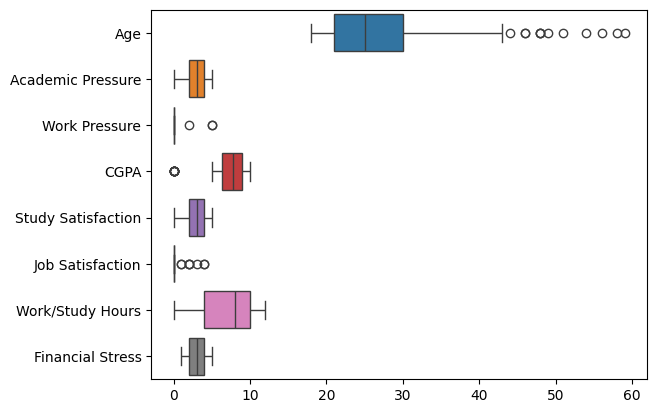

In [135]:
sns.boxplot(numeric_columns,orient="h")

Можно заметить, что в показатели AGE есть выбросы. Люди старше 30 лет не входят в рассматриваемую в исследовании группу. Так же они могут быть причиной отклонений в других признаках (Work Pressure, Job Satisfaction).    

In [136]:
data = data[data['Age'] <= 30]

In [137]:
data['Work Pressure'].value_counts()

Work Pressure
0.0    21706
2.0        1
5.0        1
Name: count, dtype: int64

In [138]:
data = data.drop(['Work Pressure'], axis=1)

In [139]:
data = data.drop(['Job Satisfaction'], axis=1)

Признаки связанные с работой малоинформативны, поэтому уберём их

In [140]:
data['Academic Pressure'].value_counts()

Academic Pressure
3.0    5767
5.0    5159
4.0    4104
1.0    3539
2.0    3132
0.0       7
Name: count, dtype: int64

In [141]:
data = data[data['Academic Pressure'] > 0]
data['Academic Pressure'].value_counts()

Academic Pressure
3.0    5767
5.0    5159
4.0    4104
1.0    3539
2.0    3132
Name: count, dtype: int64

In [142]:
data['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4814
2.0    4677
3.0    4437
1.0    4328
5.0    3443
0.0       2
Name: count, dtype: int64

In [143]:
data = data[data['Study Satisfaction'] > 0]
data['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4814
2.0    4677
3.0    4437
1.0    4328
5.0    3443
Name: count, dtype: int64

In [144]:
data= data[data['CGPA'] > 0]

In [145]:
data = data.dropna()

<Axes: >

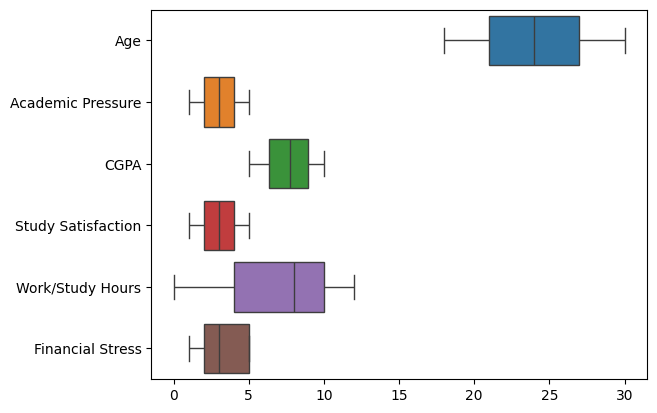

In [146]:
numeric_columns = data.select_dtypes('number').drop(['Depression'], axis=1)
sns.boxplot(numeric_columns,orient="h")

## Матрица корреляции

In [147]:
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,1,0,3.0,2.0,1,0,1
3,1,28.0,Varanasi,3.0,5.59,2.0,2,1,1,4.0,5.0,1,1,1
4,1,25.0,Jaipur,4.0,8.13,3.0,1,1,1,1.0,1.0,0,0,2
5,0,29.0,Pune,2.0,5.70,3.0,0,2,0,4.0,1.0,0,0,2
6,0,30.0,Thane,3.0,9.54,4.0,2,2,0,1.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,0,23.0,Srinagar,3.0,6.00,2.0,3,2,1,12.0,4.0,0,0,2
27896,1,27.0,Surat,5.0,5.75,5.0,1,3,1,7.0,1.0,1,0,3
27897,0,27.0,Ludhiana,2.0,9.40,3.0,0,2,0,0.0,3.0,1,0,2
27899,1,18.0,Ludhiana,5.0,6.88,2.0,0,2,1,10.0,5.0,0,1,3


In [148]:
data_numeric = data.drop(['City'], axis=1)

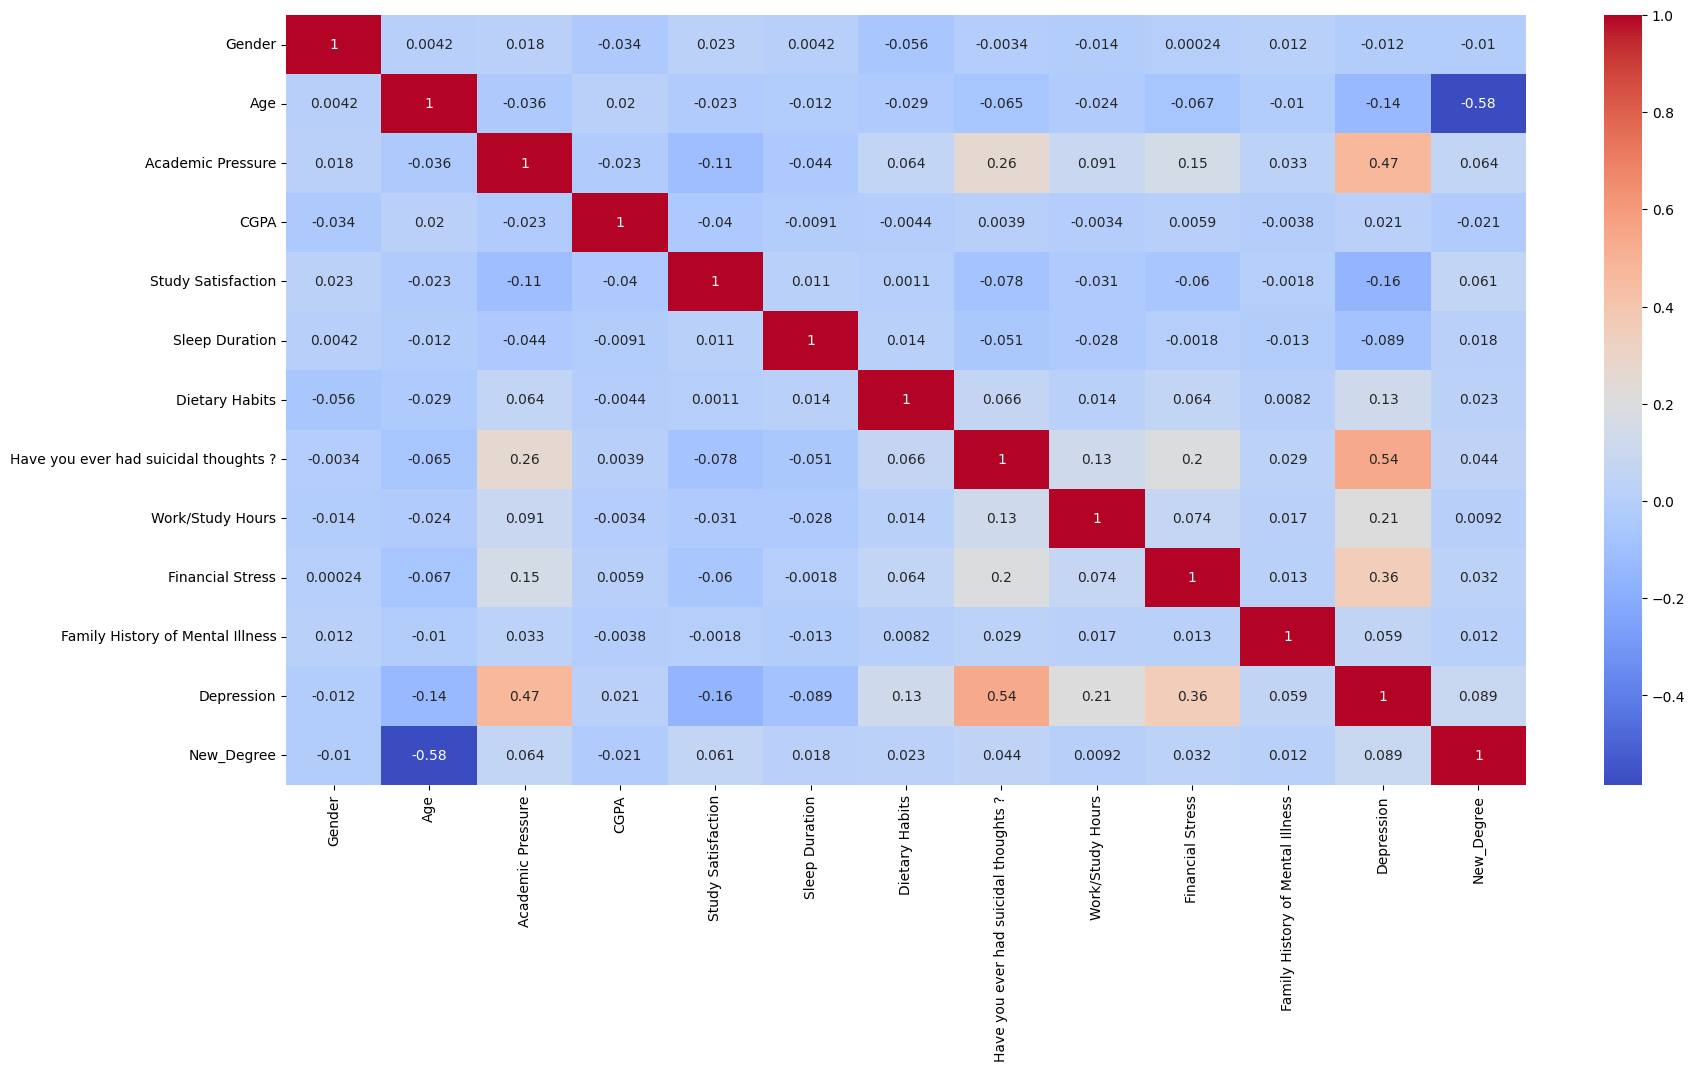

In [149]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

Исходя из полученной матрицы, можно предположить, что самыми существенными факторами для депрессии являются академическая нагрузка, наличие негативных мыслей и финансовый стресс

In [150]:
# one-hot encoding

data_encoded = pd.get_dummies(data, columns=['City'])

In [151]:
data_encoded = data_encoded * 1

In [152]:
X, y = data_encoded.drop(['Depression'], axis=1), data_encoded['Depression']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
std_scaler = StandardScaler().fit(X_train)

In [155]:
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# 3. Обучение моделей

## 3.1 Logistic Regression

In [168]:
results = {}

In [158]:
log_reg_class = LogisticRegression()
log_reg_class.fit(X_train_scaled, y_train)

LogisticRegression()

In [160]:
log_res_pred = log_reg_class.predict(X_test_scaled)

In [162]:
f1_score(y_test, log_res_pred)

0.8826475849731664

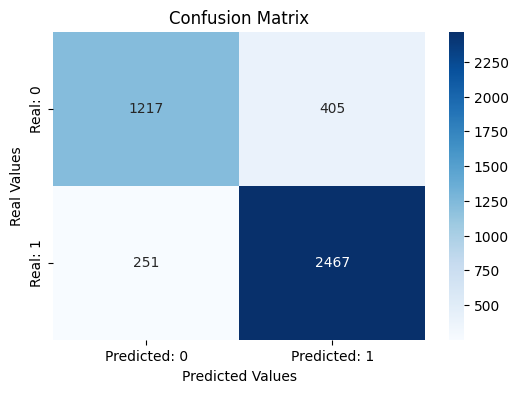

In [166]:
cm = confusion_matrix(y_test, log_res_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()

In [169]:
results['Logistic Regression'] = f1_score(y_test, log_res_pred)

Важным преимущество логистической регрессии является интерпретируемость. Выведем топ 3 параметра, которые оказывают наибольшее влияние на предсказание модели. 

In [189]:
coefs=log_reg_class.coef_[0]
top_three = np.argpartition(coefs, -3)[-3:]
top_three_sorted=top_three[np.argsort(coefs[top_three])]

In [190]:
columns = X_train.columns
print(columns[top_three_sorted[0]])
print(columns[top_three_sorted[1]])
print(columns[top_three_sorted[2]])

Financial Stress
Academic Pressure
Have you ever had suicidal thoughts ?


## 3.2 DecisionTree

In [203]:
decision_tree_class = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

In [204]:
tree_prediction = decision_tree_class.predict(X_test)

In [205]:
f1_score(y_test, tree_prediction)

0.8756660746003553

In [208]:
results['Decision Tree'] = f1_score(y_test, tree_prediction)

Дерево можно представить в виде схемы. Что позволяет легко интерпретировать процесс принятия решений

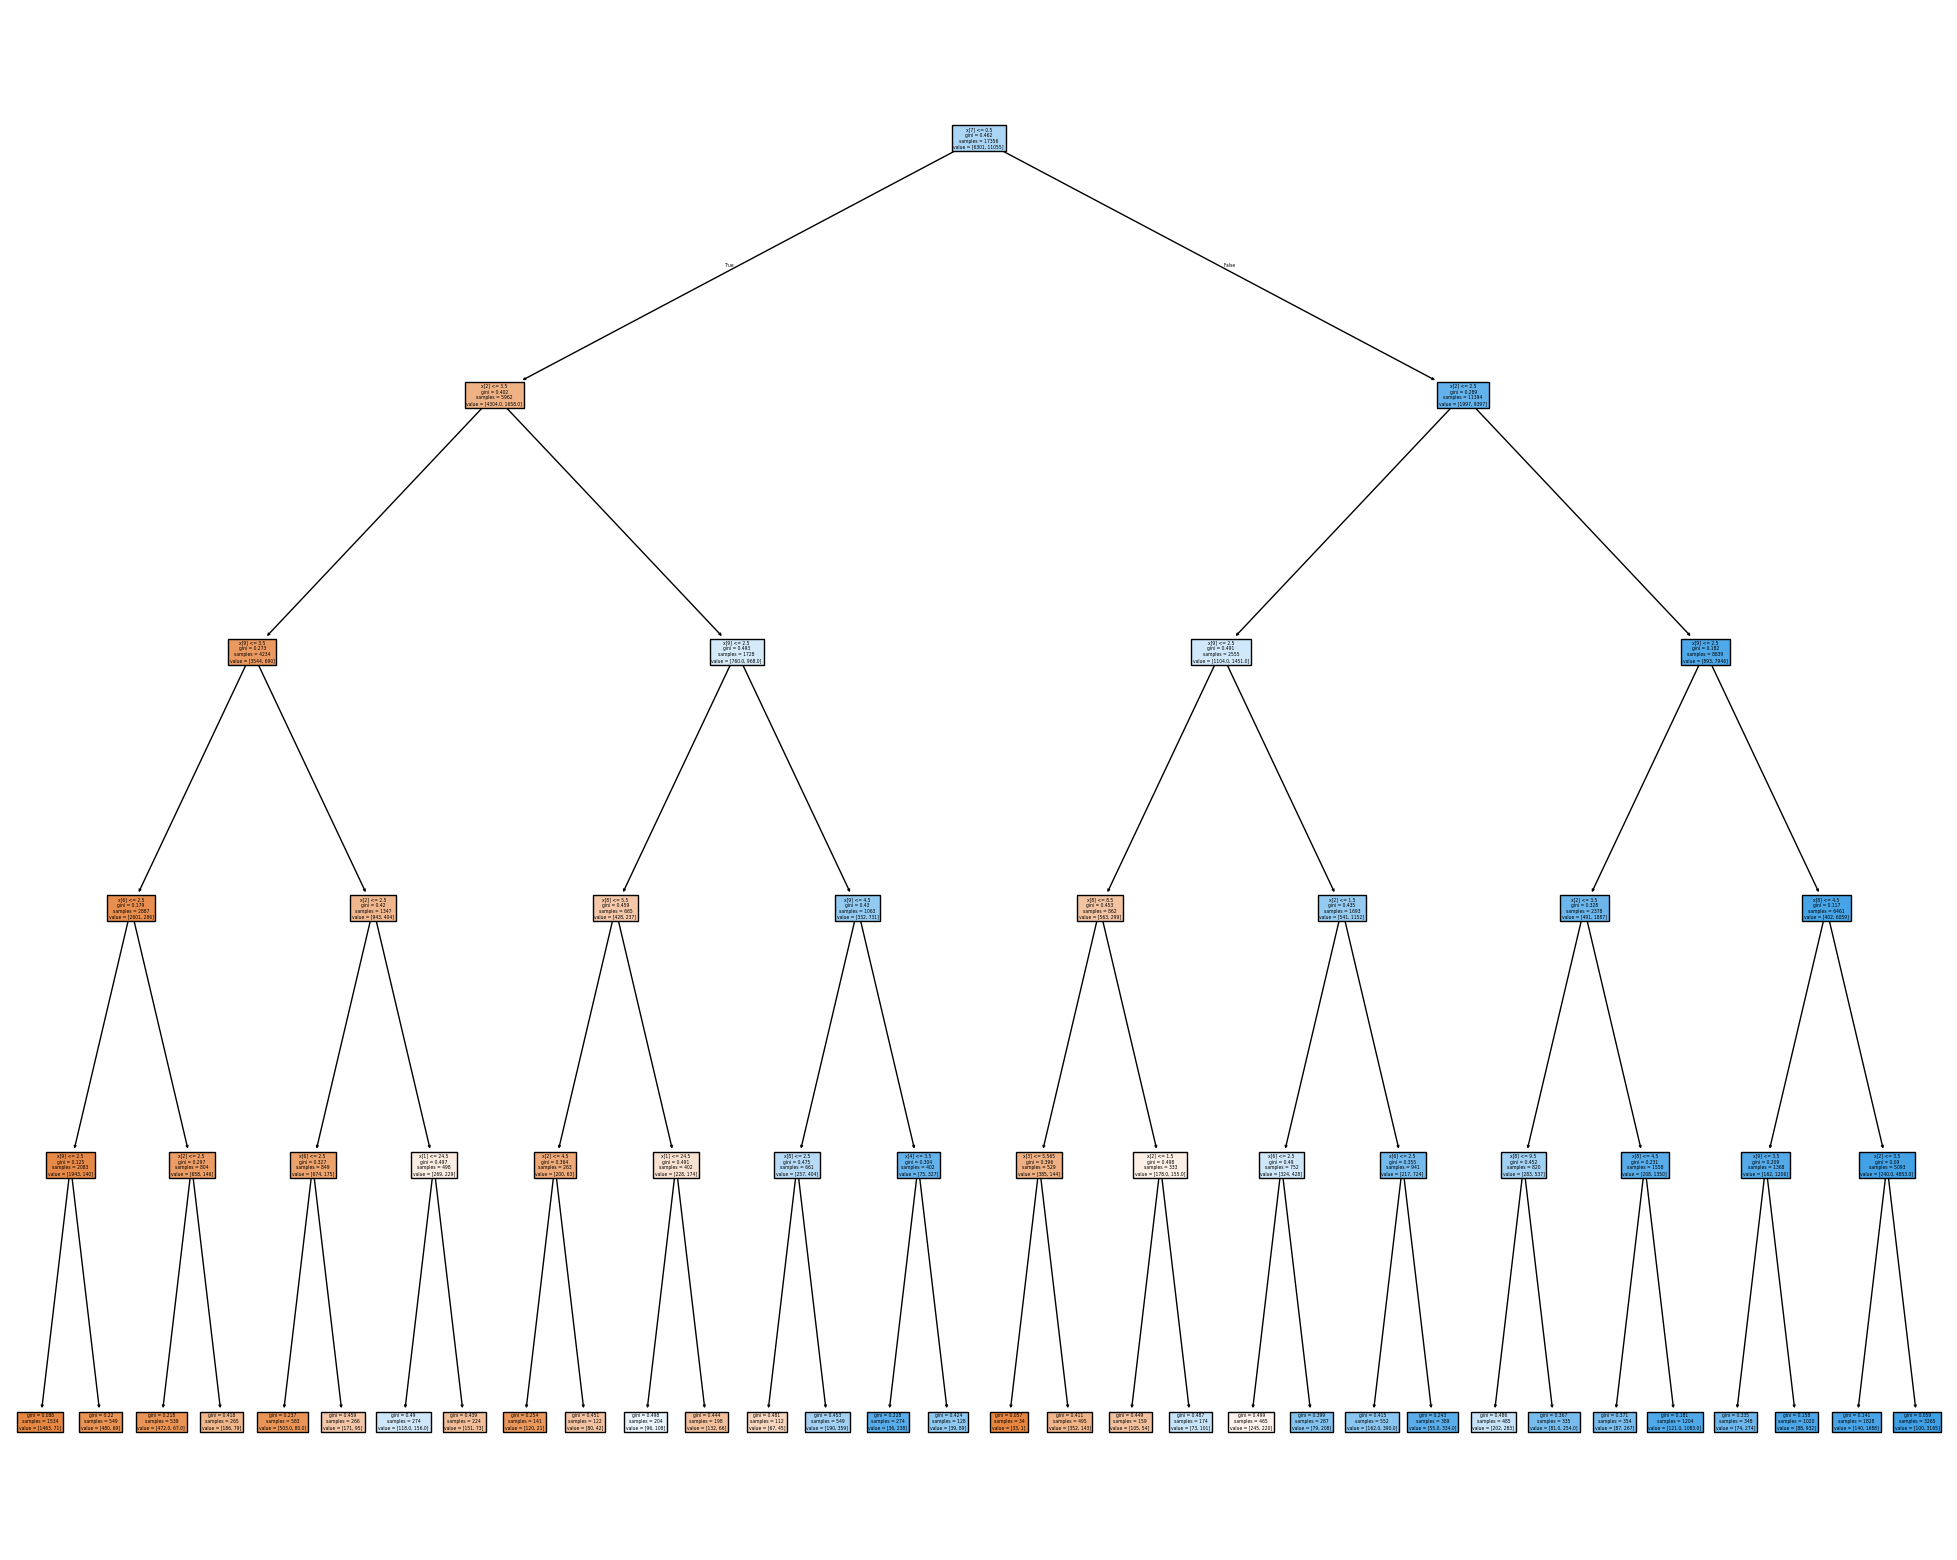

In [207]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_class,
                   filled=True)

## 3.3 Other models

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [211]:
models = {'RandomForest': RandomForestClassifier(max_depth=3, random_state=42), 
          "Gradient Boosting": GradientBoostingClassifier(random_state=42),
          "SVM": SVC(random_state=42),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Naive Bayes": GaussianNB(),
          }

In [212]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled) 
    f_1 = f1_score(y_test, y_pred)  
    results[name] = f_1

In [215]:
f_1_results_ordered = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

/tmp/ipykernel_5740/3986997677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f_1_results_ordered.values()),


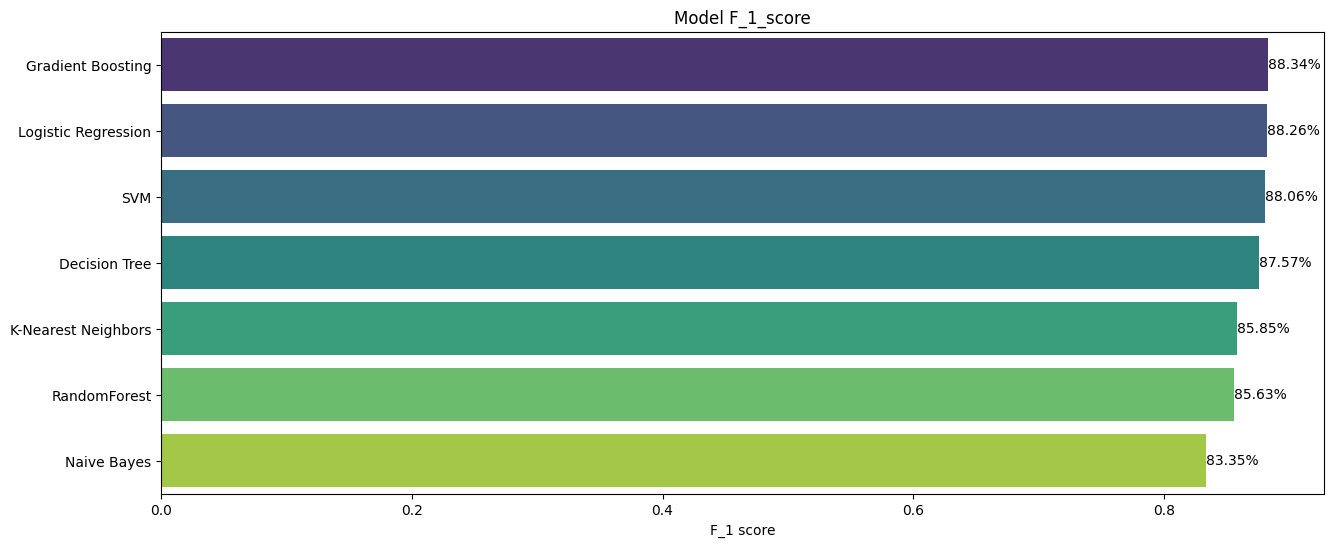

In [217]:
plt.figure(figsize=(15, 6))
sns.barplot(x=list(f_1_results_ordered.values()), 
            y=list(f_1_results_ordered.keys()), 
            palette='viridis')
plt.xlabel('F_1 score')
plt.title('Model F_1_score')

## LABELS
for i, v in enumerate(f_1_results_ordered.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()